# Assignment: The Bootstrap
## Krishu Wadhwa - euj7fh
## December 06, 2024

Do two questions.  
Questions Chosen: **Q1 and Q3**.

In [121]:
# imports 

import requests
import urllib.request
import streamlit as st
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from collections import Counter
from multiprocessing.pool import Pool
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# Question 1

A die is fair if every face is equally likely. A die has six sides if it has six dice labelled 1, 2, ... , 6.

**1. Imagine rolling two dice, $d_1$ and $d_2$. Let $R_{min}$ be the lesser value of the two face values. What is the probability of getting a 1, 2, 3, 4, 5, or 6? Which values are more or less likely compared to the roll of a single six-sided die? What is the expected value of $R_{min}$? Plot the probability and cumulative distribution functions for $R_{min}$. Compute this by hand and simulate it using the law of large numbers.**  

Expected Value of R_min:  2.5277777777777777
Probability of a single six-sided die roll:  0.16666666666666666
Probability of getting a 1:  0.3055555555555556
Probability of getting a 2:  0.25
Probability of getting a 3:  0.19444444444444445
Probability of getting a 4:  0.1388888888888889
Probability of getting a 5:  0.08333333333333333
Probability of getting a 6:  0.027777777777777776


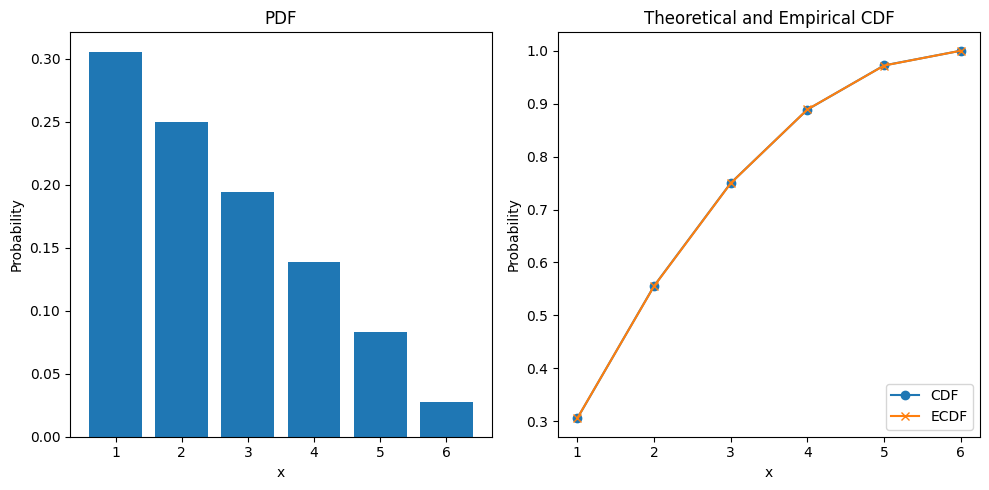

In [122]:
dice = np.array([1, 2, 3, 4, 5, 6])

# What is the probability of getting a 1, 2, 3, 4, 5, or 6?
pdf = np.zeros(6)
for i in range(6):
    for j in range(6):
        minimum = np.min([dice[i], dice[j]])
        pdf[minimum - 1] += 1 
pdf = pdf / 36
cdf = np.cumsum(pdf)

N = 1000000
d1 = np.random.choice(dice, size = N) 
d2 = np.random.choice(dice, size = N)
min_roll = [min([d1[i], d2[i]]) for i in range(N)]

ecdf = np.zeros(6) 
for i in range(6):
    ecdf[i] = (1 / N) * np.sum(min_roll <= dice[i])

# What is the expected value of R_min?
expected = np.sum(dice * pdf)
print("Expected Value of R_min: ", expected)

# Which values are more or less likely compared to the roll of a single six-sided die?
print("Probability of a single six-sided die roll: ", 1/6)
for i in range(6):
    print(f"Probability of getting a {i + 1}: ", pdf[i])

# Plot the probability and cumulative distribution functions for R_min
plt.figure(figsize = (10,5))
plt.subplot(1, 2, 1)
plt.bar(dice, pdf)
plt.title('PDF')
plt.xlabel('x')
plt.ylabel('Probability')
plt.xticks(dice)

plt.subplot(1, 2, 2)
plt.plot(dice, cdf, marker = 'o', label = 'CDF')
plt.plot(dice, ecdf, marker = 'x', label = 'ECDF')
plt.title('Theoretical and Empirical CDF')
plt.xlabel('x')
plt.ylabel('Probability')
plt.legend(loc='lower right')

plt.tight_layout()
plt.show()



As we can see, the probabilities of getting a 1, 2, 3, 4, 5, or 6 are 0.306, 0.25, 0.194, 0.139, 0.083, and 0.028, respectively. Compared to a single six-sided die (probability of 0.167), 1, 2, and 3 are more likely, whereas 4, 5, and 6 are less likely. This is because rolling two dice leads to lower numbers when taking the minimum (as there are more chances for a number to be low). The expected value of $R_{min}$ is 2.528, and this makes sense as it aligns with the tendency for lower rolls to occur more often.



**2. Imagine rolling three dice, $d_1$, $d_2$, and $d_3$. Let $R_{med}$ be the middle of the three face values. So if you roll 2, 3 and 4, the middle value is 3, and if you roll 2, 4, 4, the middle value is 4, and so on. What is the probability of getting a 1, 2, 3, 4, 5, or 6? Which values are more or less likely compared to the roll of a single six-sided die? What is the expected value of $R_{med}$? Plot the probability and cumulative distribution functions for $R_{med}$. I recommend using simulations and the law of large numbers.**

Expected value:  3.50066
Probability of a single six-sided die roll:  0.16666666666666666
Probability of getting a 1:  0.074401
Probability of getting a 2:  0.18479
Probability of getting a 3:  0.240353
Probability of getting a 4:  0.240973
Probability of getting a 5:  0.18517
Probability of getting a 6:  0.074313


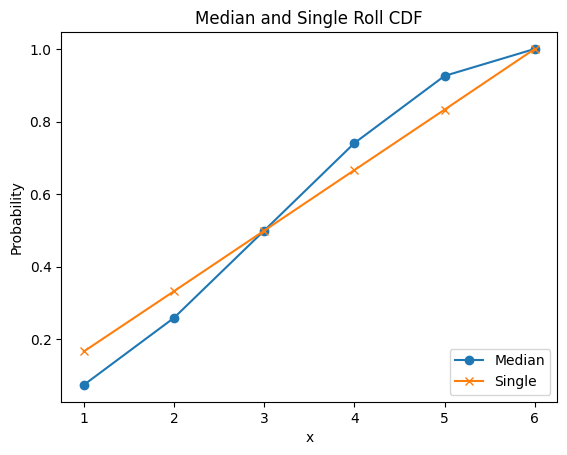

In [123]:
dice = np.array([1, 2, 3, 4, 5, 6])

# What is the probability of getting a 1, 2, 3, 4, 5, or 6?
N = 1000000
d1 = np.random.choice(dice, size = N) 
d2 = np.random.choice(dice, size = N)
d3 = np.random.choice(dice, size = N)
med_roll = [int(np.median([d1[i], d2[i], d3[i]])) for i in range(N)]

# What is the expected value of R_med?
expected_value = np.sum(med_roll)/N
print('Expected value: ', expected_value)

# Which values are more or less likely compared to the roll of a single six-sided die?
print("Probability of a single six-sided die roll: ", 1/6)
pdf = np.zeros(6)
for i in range(6):
    pdf[i] = np.sum(np.array(med_roll) == (i + 1)) / N
for i in range(6):
    print(f"Probability of getting a {i + 1}: ", pdf[i])

ecdf = np.zeros(6)
single = np.zeros(6)
for i in range(6):
    ecdf[i] = np.sum(med_roll <= dice[i]) / N
    single[i] = np.sum(d1 <= dice[i]) / N

# Plot the probability and cumulative distribution functions for R_med.
plt.plot(dice, ecdf, marker = 'o', label = 'Median')
plt.plot(dice, single, marker = 'x', label = 'Single')
plt.xlabel("x")
plt.ylabel("Probability")
plt.legend(loc = 'lower right')
plt.title('Median and Single Roll CDF')
plt.show()


As we can see, the probabilities of getting a 1, 2, 3, 4, 5, or 6 are 0.0744, 0.1848, 0.240353, 0.240973, 0.1852, and 0.0743, respectively. Compared to a single six-sided die (probability of 0.167), 3, 4, and 5 are more likely, whereas 1, 2, and 6 are less likely. This is because rolling three dice and taking the median would skew the distribution towards the middle values, as there are more rolls that result in middle number like 3 or 4. The expected value of $R_{med}$ is 3.50066, and this makes sense as it aligns with the tendency for the median to fall near the center of the range of a dice (1-6). 

**3. Imagine rolling a die. If you roll 1, 2, 3, 4, or 5, add that number to your total and stop; if you roll a six, add that number to your total and roll the die again. So you could roll, say, two sixes and then a four, and get a total of 16, or one three and get a total of 3, or twelve sixes and 1 and get 72, and so on. Write code to simulate this process, and determine its expected value using the law of large numbers. What is the probability of getting a total of 1, 2, 3, ... and so on, in your simulation? I recommend using simulations and the law of large numbers. (Hint: The `while` loop might be useful in this case.)**

Expected Value =  0    4.200904
dtype: float64
                    0
count  1000000.000000
mean         4.200904
std          3.269771
min          1.000000
25%          2.000000
50%          3.000000
75%          5.000000
max         45.000000


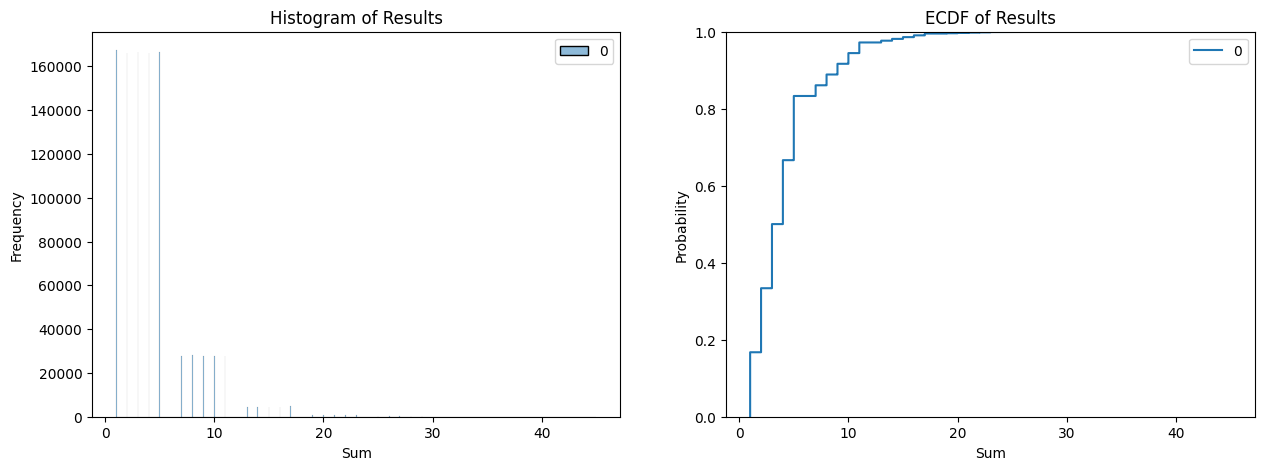

In [124]:
dice = np.array([1, 2, 3, 4, 5, 6])

N = 1000000
results = []
for i in range(N):
    six = True
    sum = 0
    while six is True:
        roll = np.random.choice(dice, size = 1)
        sum += roll
        if roll < 6:
            six = False
            results.append(int(sum[0]))

# Expected value
results = pd.DataFrame(results)
print("Expected Value = ", results.mean())
print(results.describe())

# What is the probability of getting a total of 1, 2, 3, ... and so on, in your simulation? - Can be seen through graphs.
plt.figure(figsize = (15, 5))
plt.subplot(1, 2, 1)
sns.histplot(results)
plt.title('Histogram of Results')
plt.xlabel('Sum')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
sns.ecdfplot(results)
plt.title('ECDF of Results')
plt.xlabel('Sum')
plt.ylabel('Probability')

plt.show()

# Question 3

This question refers to the `diabetes_hw.csv` data. It contains two variables, `outcome` and `treatment`. Each is looking at whether an individual's diabetes was successfully treated (`outcome==success`) with `lifestyle` interventions like exercises and diets, a drug denoted by `met` (metformin), or a drug denoted by `rosi` (rosiglitazone), or not (`outcome==failure`). Treatment success means that the individual no longer needs to be treated with insulin, while failure means the patient still required insulin injections after treatment.

**1. Cross tabulate `treatment` and `outcome`.**  

In [125]:
url = 'https://raw.githubusercontent.com/DS3001/the_bootstrap/refs/heads/main/data/diabetes_hw.csv' # url of data
diabetes = pd.read_csv(url, low_memory=False) # read csv from url
diabetes.head()

,Unnamed: 0,treatment,outcome
0,1,met,success
1,2,rosi,failure
2,3,rosi,success
3,4,lifestyle,success
4,5,met,success


In [126]:
crosstab = pd.crosstab(diabetes['treatment'], diabetes['outcome'], margins = True)
print(crosstab)

crosstab_norm = pd.crosstab(diabetes['treatment'], diabetes['outcome'], margins = True, normalize='all')
print(crosstab_norm)

outcome    failure  success  All
treatment                       
lifestyle      109      125  234
met            120      112  232
rosi            90      143  233
All            319      380  699
outcome     failure   success       All
treatment                              
lifestyle  0.155937  0.178827  0.334764
met        0.171674  0.160229  0.331903
rosi       0.128755  0.204578  0.333333
All        0.456366  0.543634  1.000000


The cross-table shows that rosiglitazone (rosi) has the highest success rate, with 61.37% of treatments resulting in success, while only 38.63% resulted in failure. Lifestyle interventions were the second highest, with a 53.42% success rate and a 46.58% failure rate. Metformin (met) had the lowest success rate with 48.28% and a failure rate of 51.72%. Overall, there was a success rate of 54.36% and a failure rate of 45.64%.

**2. Compute the the proportion of successes for each treatment. Which treatment appears to be the most effective?**

In [127]:
print(f"Lifestyle Success Rate: {(125 / 234) * 100}%")
print(f"Lifestyle Failure Rate: {(109 / 234) * 100}%")

print(f"Metformin (met) Success Rate: {(112 / 232) * 100}%")
print(f"Metformin (met) Failure Rate: {(120 / 232) * 100}%")

print(f"Rosiglitazone (rosi) Success Rate: {(143 / 233) * 100}%")
print(f"Rosiglitazone (rosi) Failure Rate: {(90 / 233) * 100}%")

print(f"Overall Success Rate: {(380 / 699) * 100}%")
print(f"Overall Failure Rate: {(319 / 699) * 100}%")

Lifestyle Success Rate: 53.41880341880342%
Lifestyle Failure Rate: 46.58119658119658%
Metformin (met) Success Rate: 48.275862068965516%
Metformin (met) Failure Rate: 51.724137931034484%
Rosiglitazone (rosi) Success Rate: 61.37339055793991%
Rosiglitazone (rosi) Failure Rate: 38.62660944206009%
Overall Success Rate: 54.36337625178827%
Overall Failure Rate: 45.63662374821173%


Based on success rates, the treatment which appears to be the most effective is Rosiglitazone (rosi) with a success rate of 61.37%. This is followed by Lifestyle with a success rate of 53.42%. The least effective treatment was Metformin (met) with a success rate of 48.28%.

**3. Bootstrap the density and distribution of the proportion of successes for each interventions. Create empirical Cdiabetes and kernel density plots that are grouped by treatment type. Which treatment appears to be the most effective?**

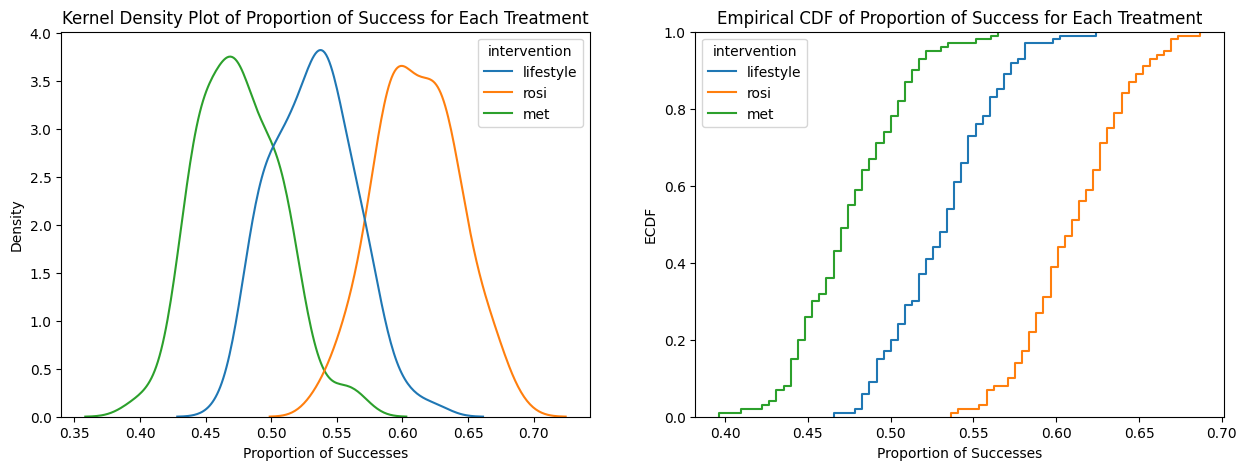

In [132]:
lifestyle_data = diabetes.loc[ diabetes['treatment'] == 'lifestyle', :]
rosi_data = diabetes.loc[ diabetes['treatment'] == 'rosi', :]
met_data = diabetes.loc[ diabetes['treatment'] == 'met', :]

diabetes['success'] = 0
diabetes.loc[diabetes['outcome'] == 'success', 'success'] = 1

samples = 100

lifestyle = []
rosi = []
met = []

for t in range(samples):
    lifestyle_t = lifestyle_data.sample(lifestyle_data.shape[0], axis=0, replace=True)
    rosi_t = rosi_data.sample(rosi_data.shape[0], axis=0, replace=True)
    met_t = met_data.sample(met_data.shape[0], axis=0, replace=True)
    
    fx_lifestyle_t = np.mean(lifestyle_t['success'])
    fx_rosi_t = np.mean(rosi_t['success'])
    fx_met_t = np.mean(met_t['success'])
    
    lifestyle.append(fx_lifestyle_t)
    rosi.append(fx_rosi_t)
    met.append(fx_met_t)

combined_lifestyle = pd.DataFrame({'value': lifestyle, 'intervention': 'lifestyle'})
combined_rosi = pd.DataFrame({'value': rosi, 'intervention': 'rosi'})
combined_met = pd.DataFrame({'value': met, 'intervention': 'met'})
combined = pd.concat([combined_lifestyle, combined_rosi, combined_met], axis=0)

plt.figure(figsize = (15, 5))

plt.subplot(1, 2, 1)
sns.kdeplot(data = combined, x = 'value', hue = 'intervention')
plt.title('Kernel Density Plot of Proportion of Success for Each Treatment')
plt.xlabel('Proportion of Successes')
plt.ylabel('Density')

plt.subplot(1, 2, 2)
sns.ecdfplot(data = combined, x = 'value', hue = 'intervention')
plt.title('Empirical CDF of Proportion of Success for Each Treatment')
plt.xlabel('Proportion of Successes')
plt.ylabel('ECDF')

plt.show()

**4. For each comparison (lifestyle versus met, met versus rosi, rosi versus lifestyle), bootstrap the distribution of the difference in outcomes. At the 90% level of confidence, which pairwise treatment comparisons are significantally different?**

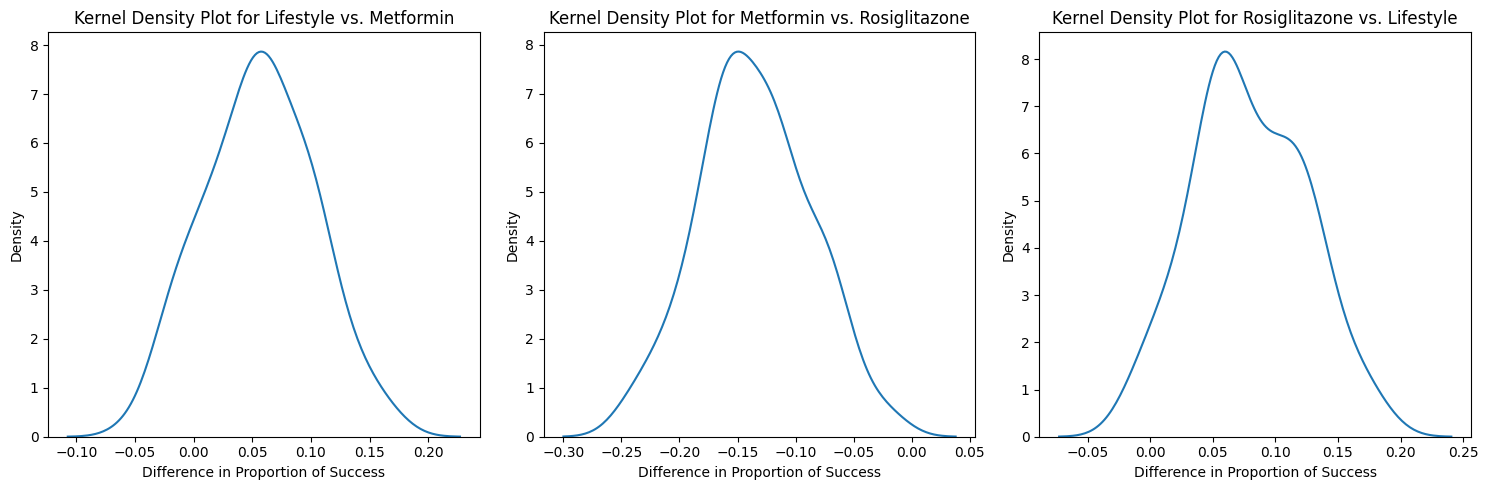

In [133]:
lifestyle_versus_met = np.array(lifestyle) - np.array(met)
met_versus_rosi = np.array(met) - np.array(rosi)
rosi_versus_lifestyle = np.array(rosi) - np.array(lifestyle)

plt.figure(figsize = (15, 5))

plt.subplot(1, 3, 1)
sns.kdeplot(x = lifestyle_versus_met)
plt.title('Kernel Density Plot for Lifestyle vs. Metformin')
plt.xlabel('Difference in Proportion of Success')
plt.ylabel('Density')

plt.subplot(1, 3, 2)
sns.kdeplot(x = met_versus_rosi)
plt.title('Kernel Density Plot for Metformin vs. Rosiglitazone')
plt.xlabel('Difference in Proportion of Success')
plt.ylabel('Density')

plt.subplot(1, 3, 3)
sns.kdeplot(x = rosi_versus_lifestyle)
plt.title('Kernel Density Plot for Rosiglitazone vs. Lifestyle')
plt.xlabel('Difference in Proportion of Success')
plt.ylabel('Density')

plt.tight_layout()
plt.show()


In [134]:
print('90% Confidence interval, Lifestyle and Metformin: ', np.quantile(lifestyle_versus_met, .05), ', ', np.quantile(lifestyle_versus_met, .95))
print('90% Confidence interval, Metformin and Rosiglitazone: ', np.quantile(met_versus_rosi, .05), ', ', np.quantile(met_versus_rosi, .95))
print('90% Confidence interval, Rosiglitazone and Lifestyle: ', np.quantile(rosi_versus_lifestyle, .05), ', ', np.quantile(rosi_versus_lifestyle, .95))


90% Confidence interval, Lifestyle and Metformin:  -0.0178584585912172 ,  0.13296124373710572
90% Confidence interval, Metformin and Rosiglitazone:  -0.21312897735681513 ,  -0.06207821518425337
90% Confidence interval, Rosiglitazone and Lifestyle:  0.010373794064781163 ,  0.1487436264260298


There is no statistically significant difference between Lifestyle and Metformin, since 0 is in the 90% confidence interval. The confidence interval of $(-0.018, 0.133)$ means that we are 90% confident that the difference in effect sizes is between $-0.018$ and $0.133$. On the other hand, Metformin appears worse than Rosiglitazone, since the 90% confidence interval doesn't include zero. In this case, the confidence interval of $(-0.213, -0.062)$ means that we are 90% confident that the difference in effect sizes is between $-0.213$ and $-0.062$. Lastly, and similarly to the relationship between Metformin and Rosiglitazone, there is a statistically significant difference between Rosiglitazone and Lifestyle as there is no 0 in the 90% confidence interval. In this case, the confidence interval of $(0.010, 0.148)$ means that we are 90% confident that the difference in effect sizes is between $0.010$ and $0.148$.

**5. Which treatment appears to be the most effective overall?**

Based on the bootstrapped results and the 90% confidence intervals, Rosiglitazone seems to be the most effective treatment.  Rosiglitazone had a success rate of 61.37%, compared to Lifestyle's success rate of 53.42% and Metformin's success rate of 48.28%. Furthermore, the 90% confidence intervals for Metformin vs. Rosiglitazone $(-0.213, -0.062)$ and Rosiglitazone vs. Lifestyle $(0.010, 0.148)$ do not contain zero, and this suggests that Rosiglitazone provides a stastically significant benefit over both treatments. However, Rosiglitazone is still a drug, and there may be long-term health side-effects which could range in severity amongst patients. For example, patients could get liver or kidney illnesses as a result, as many medicines (even including tylenol) are broken down by the liver. Therefore, in reality, lifestyle interventions, with the second-highest success rate of 53.42%, may be the best and most effective treatment overall. This is because it is a better long-term treatment as it avoids any additional risks. However, if this is not possible, then obviously the Rosiglitazone treatment would be the best. In conclusion, the best treatment is either Rosiglitazone or Lifestyle interventions, and this would vary patient to patient based on their ability to incorporate those lifetyle interventions. If they can do it successfully, then lifestyle interventions is the better treatement; if not, then Rosiglitazone is the better treatment.